In [3]:
import pandas as pd

In [4]:
olym_df = pd.read_csv('Data/SummerOlympics.csv', skiprows = 4)
olym_df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


# heatmap

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
last_oly = olym_df[olym_df.Edition == 2008]
last_oly

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
27179,Beijing,2008,Aquatics,Diving,"HEYMANS, Emilie",CAN,Women,10m platform,W,Silver
27180,Beijing,2008,Aquatics,Diving,"QIN, Kai",CHN,Men,3m springboard,M,Bronze
27181,Beijing,2008,Aquatics,Diving,"HE, Chong",CHN,Men,3m springboard,M,Gold
27182,Beijing,2008,Aquatics,Diving,"DESPATIE, Alexandre",CAN,Men,3m springboard,M,Silver
27183,Beijing,2008,Aquatics,Diving,"WU, Minxia",CHN,Women,3m springboard,W,Bronze


In [34]:
g = last_oly.groupby(['NOC', 'Medal']).size().unstack('Medal', fill_value = 0)
g = g.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']]

In [36]:
g = g.transpose()
g


NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


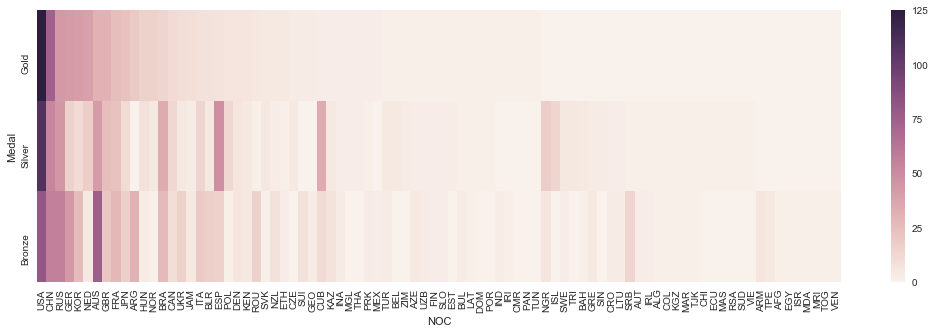

In [37]:
plt.figure(figsize = (18, 5))
sns.heatmap(g)

# Creating our own color maps

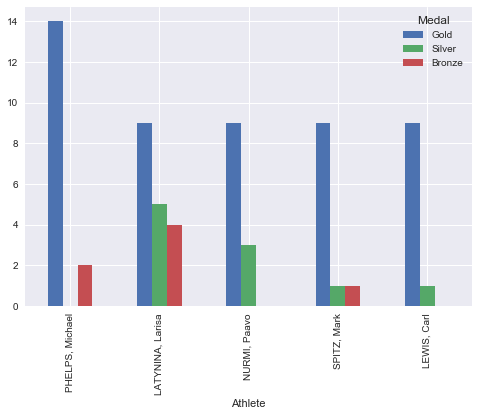

In [41]:
h = olym_df.groupby(['Athlete', 'Medal']).size().unstack('Medal', fill_value = 0)
h = h.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']].head().plot(kind = 'bar')
h

In [42]:
from matplotlib.colors import ListedColormap

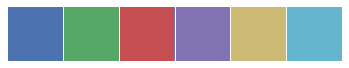

In [43]:
sns.palplot(sns.color_palette())

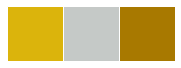

In [44]:
gsb = ['#dbb40c', '#c5c9c7', '#a87900']
sns.palplot(sns.color_palette(gsb))